In [157]:
#Import Libraries

import pandas as pd
import math
import statistics
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier







import warnings
warnings.filterwarnings('ignore')

In [158]:
# setting my directory to where all data sets will be stored for this class
%cd C:/data

C:\data


In [159]:
#Import Data Set
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [160]:
#Find Number of Columns and Rows in Data Set

bank_df.shape

(4521, 17)

In [161]:
#Find Type of Variables

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [162]:
#Descriptive Statistics

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [163]:
#Find any missing values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [164]:
# Create new dataframe

bank = pd.DataFrame(data = bank_df)

In [165]:
#Change *job*, *marital*, *education*, *contact*, *poutcome* to categories.

bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')
bank['month'] = bank['month'].astype('category')

In [166]:
#Bin Jobs

bank['job'] = bank['job'].replace({'management': 'Employed', 'blue-collar': 'Employed',
                                 'technician': 'Employed', 'admin.': 'Employed',
                                 'services': 'Employed', 'retired': 'Unemployed',
                                 'self-employed': 'Self-employed', 'entrepreneur':'Employed',
                                 'unemployed': 'Unemployed', 'housemaid': 'Employed',
                                 'student': 'Unemployed', 'unknown': 'Employed'})

In [167]:
#Replace yes and no to binary values 0 and 1

bank['y'] = (bank['y']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['default'] = (bank['default']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['housing'] = (bank['housing']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['loan'] = (bank['loan']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [168]:
#Turn categorical variables job and marital into dummy variables

cat_df = bank[['job', 'marital']]
dummy = pd.get_dummies(cat_df)

#Merge back into dataset

bank = pd.concat([bank,dummy], axis = 1)

#Drop job and marital original

bank = bank.drop(['job', 'marital'], axis = 1)

In [169]:
#Turn Education to ordinal

bank['education'] = bank['education'].replace({'primary': '0',
                                              'secondary': '.25',
                                              'tertiary': '.5',
                                              'unknown': '1'})
bank['education'].astype(float)

0       0.00
1       0.25
2       0.50
3       0.50
4       0.25
        ... 
4516    0.25
4517    0.50
4518    0.25
4519    0.25
4520    0.50
Name: education, Length: 4521, dtype: float64

In [170]:
bank = bank.rename(columns={'y': 'deposit'})

In [171]:
bank['job_Employed'] = bank['job_Employed'].astype('float')
bank['job_Self-employed'] = bank['job_Self-employed'].astype('float')
bank['job_Unemployed'] = bank['job_Unemployed'].astype('float')
bank['marital_divorced'] = bank['marital_divorced'].astype('float')
bank['marital_married'] = bank['marital_married'].astype('float')
bank['marital_single'] = bank['marital_single'].astype('float')

bank.dtypes

age                     int64
education              object
default                 int32
balance                 int64
housing                 int32
loan                    int32
contact              category
day                     int64
month                category
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome             category
deposit                 int32
job_Employed          float64
job_Self-employed     float64
job_Unemployed        float64
marital_divorced      float64
marital_married       float64
marital_single        float64
dtype: object

In [172]:
bank.head()


,age,education,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,deposit,job_Employed,job_Self-employed,job_Unemployed,marital_divorced,marital_married,marital_single
0,30,0,0,1787,0,0,cellular,19,oct,79,...,-1,0,unknown,0,0.0,0.0,1.0,0.0,1.0,0.0
1,33,.25,0,4789,1,1,cellular,11,may,220,...,339,4,failure,0,1.0,0.0,0.0,0.0,1.0,0.0
2,35,.5,0,1350,1,0,cellular,16,apr,185,...,330,1,failure,0,1.0,0.0,0.0,0.0,0.0,1.0
3,30,.5,0,1476,1,1,unknown,3,jun,199,...,-1,0,unknown,0,1.0,0.0,0.0,0.0,1.0,0.0
4,59,.25,0,0,1,0,unknown,5,may,226,...,-1,0,unknown,0,1.0,0.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'Distribution over Months')

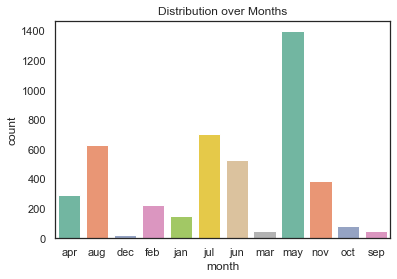

In [173]:
sns.countplot(x = bank['month'], palette = 'Set2', data = bank).set_title('Distribution over Months')

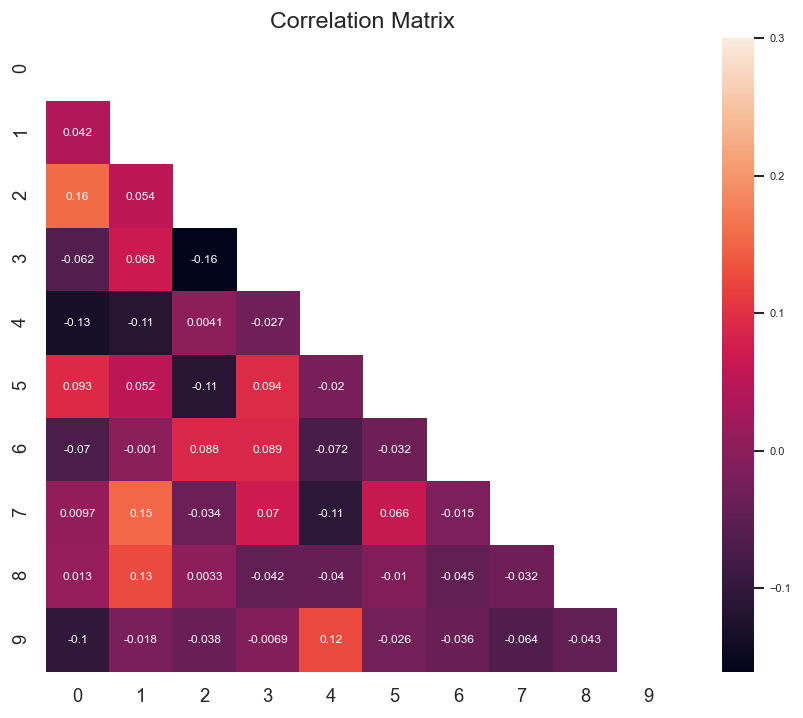

In [174]:
#Find which variables have the highest correlation
%matplotlib inline

corr = np.corrcoef(np.random.randn(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (9,7), dpi = 120)
    sns.set(font_scale = .6)
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)
    ax.set_title('Correlation Matrix', fontsize = 14)

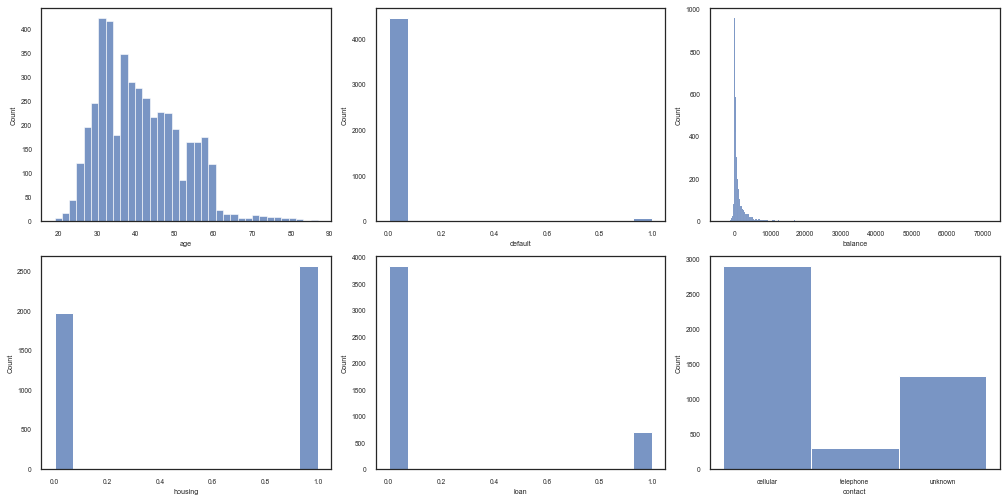

In [175]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'age', ax = axs[0,0])
sns.histplot(data = bank, x = 'default', ax = axs[0,1])
sns.histplot(data = bank, x = 'balance', ax = axs[0,2])
sns.histplot(data = bank, x = 'housing', ax = axs[1,0])
sns.histplot(data = bank, x = 'loan', ax = axs[1,1])
sns.histplot(data = bank, x = 'contact', ax = axs[1,2])


plt.tight_layout()

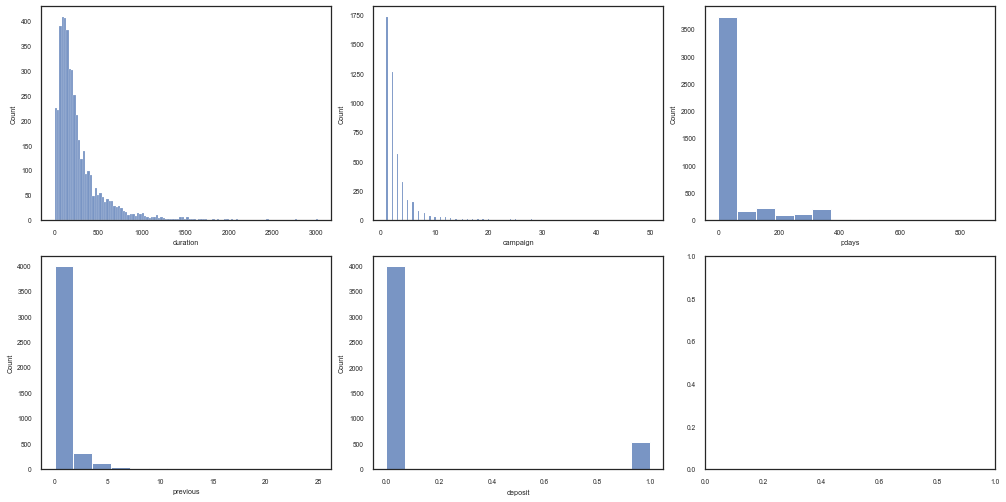

In [176]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'duration', ax = axs[0,0])
sns.histplot(data = bank,x = 'campaign', ax = axs[0,1])
sns.histplot(data = bank, x = 'pdays', ax = axs[0,2])
sns.histplot(data = bank, x = 'previous', ax = axs[1,0])
sns.histplot(data = bank, x = 'deposit', ax = axs[1,1])

plt.tight_layout()

In [177]:
bank.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,job_Employed,job_Self-employed,job_Unemployed,marital_divorced,marital_married,marital_single
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092,-0.216564,0.005505,0.248026,0.148043,0.275139,-0.410768
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303,-0.002460,0.008064,-0.002492,0.048878,-0.039031,0.007391
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905,-0.035817,-0.002064,0.042994,-0.036284,0.017158,0.007525
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683,0.178132,-0.035287,-0.183600,-0.001197,0.038432,-0.041449
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517,0.034775,0.006331,-0.044615,0.017798,0.032272,-0.048496
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244,-0.002249,0.006601,-0.001766,-0.007121,-0.001438,0.006769
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118,-0.020995,0.000130,0.024313,0.021373,-0.036436,0.024560
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147,0.007217,0.032040,-0.029648,-0.022157,0.022000,-0.008093
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087,0.019768,-0.023614,-0.007304,-0.003411,-0.016537,0.020693
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714,-0.018123,0.005772,0.017232,-0.022158,-0.017640,0.035558


Text(0.5, 1.0, 'Centrality for Age')

<Figure size 1008x864 with 0 Axes>

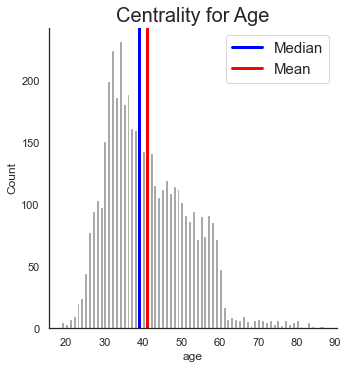

In [178]:
# Plot Size

sns.set(font_scale=1)
Size = plt.figure()
Size.set_figwidth(14)
Size.set_figheight(12)
sns.set_style("white")

#Plot Histogram

Central_Age = sns.displot(bank["age"], kde=False, binwidth=.5, color = 'grey')
plt.axvline(x=bank.age.median(), linewidth=3, color='blue', label="median", alpha=1)
plt.axvline(x=bank.age.mean(), linewidth=3, color='red', label="mean", alpha=1)
plt.legend(['Median', 'Mean'], fontsize=15)
plt.title("Centrality for Age", fontsize=20)

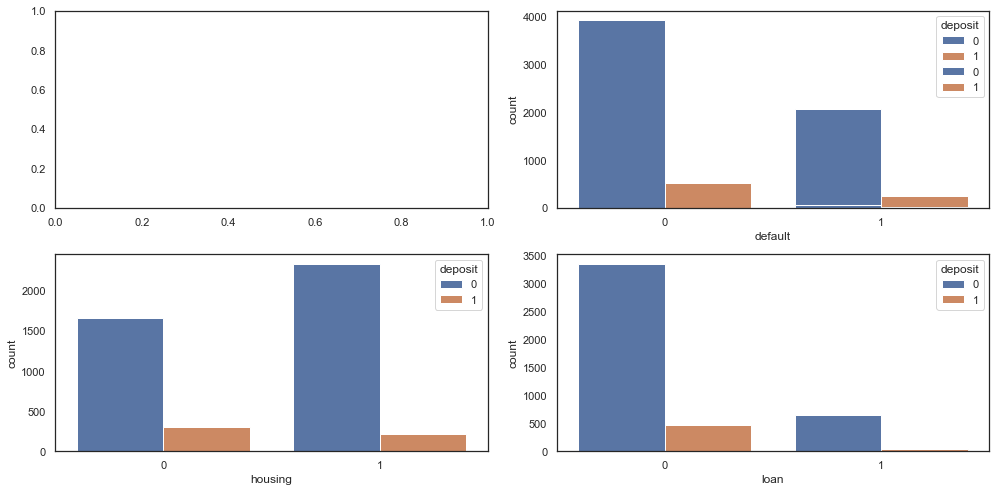

In [179]:
f, axs = plt.subplots(2, 2, figsize = (14,7))
sns.countplot(data = bank, x = 'education', hue = 'deposit', ax = axs[0,1])
sns.countplot(data = bank, x = 'default', hue = 'deposit',ax = axs[0,1])
sns.countplot(data = bank, x = 'housing', hue = 'deposit',ax = axs[1,0])
sns.countplot(data = bank, x = 'loan', hue = 'deposit',ax = axs[1,1])


plt.tight_layout()

In [180]:
# Helper functions
def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

In [181]:
bank.dtypes

age                     int64
education              object
default                 int32
balance                 int64
housing                 int32
loan                    int32
contact              category
day                     int64
month                category
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome             category
deposit                 int32
job_Employed          float64
job_Self-employed     float64
job_Unemployed        float64
marital_divorced      float64
marital_married       float64
marital_single        float64
dtype: object

In [198]:
b_age = [0,21,65,99999]
l_age = ['Youth','Adult','Senior']

bank['age'] = pd.cut(bank['age'], bins=b_age, labels=l_age, include_lowest=True)

# convert the categories into numbers
bank['age'] = bank['age'].replace({'Youth': '0',
                                   'Adult':'1',
                                   'Senior':'2'
                                  })

In [183]:
bank['contact'] = bank['contact'].replace({'cellular': '0',
                                           'telephone':'1',
                                           'unknown':'2'
                                  })

bank['poutcome'] = bank['poutcome'].replace({'failure': '0',
                                             'other':'1',
                                             'success':'2',
                                             'unknown':'3'
                                  })

In [184]:
bank['month'] = bank['month'].replace({'jan': '1',
                                        'feb':'1',
                                        'mar':'1',
                                       'apr':'2',
                                       'may':'2',
                                       'jun':'2',
                                       'jul':'3',
                                       'aug':'3',
                                       'sep':'3',
                                       'oct':'4',
                                       'nov':'4',
                                       'dec':'4'
                                    })

In [185]:
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,deposit,job_Employed,job_Self-employed,job_Unemployed,marital_divorced,marital_married,marital_single
0,30,0,0,1787,0,0,0,19,4,79,...,-1,0,3,0,0.0,0.0,1.0,0.0,1.0,0.0
1,33,.25,0,4789,1,1,0,11,2,220,...,339,4,0,0,1.0,0.0,0.0,0.0,1.0,0.0
2,35,.5,0,1350,1,0,0,16,2,185,...,330,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0
3,30,.5,0,1476,1,1,2,3,2,199,...,-1,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0
4,59,.25,0,0,1,0,2,5,2,226,...,-1,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0


In [186]:
bank.dtypes

age                    int64
education             object
default                int32
balance                int64
housing                int32
loan                   int32
contact               object
day                    int64
month                 object
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
deposit                int32
job_Employed         float64
job_Self-employed    float64
job_Unemployed       float64
marital_divorced     float64
marital_married      float64
marital_single       float64
dtype: object

In [187]:
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,deposit,job_Employed,job_Self-employed,job_Unemployed,marital_divorced,marital_married,marital_single
0,30,0,0,1787,0,0,0,19,4,79,...,-1,0,3,0,0.0,0.0,1.0,0.0,1.0,0.0
1,33,.25,0,4789,1,1,0,11,2,220,...,339,4,0,0,1.0,0.0,0.0,0.0,1.0,0.0
2,35,.5,0,1350,1,0,0,16,2,185,...,330,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0
3,30,.5,0,1476,1,1,2,3,2,199,...,-1,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0
4,59,.25,0,0,1,0,2,5,2,226,...,-1,0,3,0,1.0,0.0,0.0,0.0,1.0,0.0


In [188]:
#Train, Valid, Test Split
train, temp = train_test_split(bank, train_size=1700, random_state=1)
valid, test = train_test_split(temp, train_size=1488, random_state=1)

print('Training   : ', train.shape)
print('Validation : ', valid.shape)
print('Test : ', test.shape)

Training   :  (1700, 21)
Validation :  (1488, 21)
Test :  (1333, 21)


In [189]:
#Set Variables
#predictors = list(bank.columns)
predictors = ['age', 'education', 'default', 'balance', 'housing', 'loan','contact', 'day', 'month', 'duration', 'campaign', 'pdays', 
              'previous', 'poutcome', 'job_Employed', 'job_Self-employed', 'job_Unemployed', 'marital_divorced', 'marital_married', 
              'marital_single']
outcome = 'deposit'
# predictors.remove(outcome)
# print(predictors)

train_X = train[predictors]
train_y = train[outcome]
valid_X = valid[predictors]
valid_y = valid[outcome]
test_X = test[predictors]
test_y = test[outcome]
train_X.shape

(1700, 20)

In [190]:
#Importing libraries used for this assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

from dmba import classificationSummary, liftChart, gainsChart, stepwise_selection, plotDecisionTree, regressionSummary 
from dmba import exhaustive_search, adjusted_r2_score, backward_elimination, forward_selection
from dmba.metric import AIC_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [199]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.8935)

       Prediction
Actual    0    1
     0 1470   30
     1  151   49
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8797)

       Prediction
Actual    0    1
     0 1274   43
     1  136   35


In [200]:
model = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv=5, max_iter=500)
model.fit(train_X, train_y)

print('regularization', model.C_)
print('intercept ', model.intercept_[0])
df = pd.DataFrame({
'coeff': model.coef_[0],
'abs_coeff': np.abs(model.coef_[0])
}, index=predictors)
print(df.sort_values(by=['abs_coeff'], ascending=False))


regularization [0.00077426]
intercept  -3.4685509292441568
                      coeff  abs_coeff
previous           0.044316   0.044316
contact           -0.034114   0.034114
housing           -0.019233   0.019233
campaign          -0.011164   0.011164
loan              -0.010819   0.010819
marital_single     0.010244   0.010244
marital_married   -0.009814   0.009814
job_Unemployed     0.009115   0.009115
poutcome           0.007768   0.007768
job_Employed      -0.007555   0.007555
day               -0.007392   0.007392
month              0.007331   0.007331
education          0.004317   0.004317
duration           0.003788   0.003788
pdays              0.003035   0.003035
job_Self-employed -0.001095   0.001095
age                0.001070   0.001070
default            0.000211   0.000211
balance            0.000050   0.000050
marital_divorced   0.000036   0.000036


In [201]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegressionCV(penalty="l2", solver='saga', cv=5,max_iter=5000)
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return 0
    logit_reg_valid = model.predict(valid_X[variables])
    return -accuracy_score(valid_y, [1 if p > 0.5 else 0 for p in logit_reg_valid])

logreg_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction='forward', verbose=True)
print(best_variables)
logreg_model_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add age
Step: score=-0.89, unchanged None
['age']


In [202]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from dmba import stepwise_selection, regressionSummary, gainsChart, AIC_score

In [203]:
# Linear regression model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y, [train_y.mean()] * len(train_y),model)
    return mean_squared_error(train_y, model.predict(train_X[variables]))

linear_model, best_variables = stepwise_selection(predictors, train_model,score_model,
direction='stepwise',verbose=True)
print(best_variables)
linear_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.10, constant
Step: score=0.09, add duration
Step: score=0.08, add previous
Step: score=0.08, add contact
Step: score=0.08, add housing
Step: score=0.08, add loan
Step: score=0.08, add job_Unemployed
Step: score=0.08, add marital_single
Step: score=0.08, add pdays
Step: score=0.08, add poutcome
Step: score=0.08, add education
Step: score=0.08, add balance
Step: score=0.08, add day
Step: score=0.08, add job_Employed
Step: score=0.08, add marital_divorced
Step: score=0.08, add default
Step: score=0.08, add age
Step: score=0.08, add month
Step: score=0.08, add campaign
Step: score=0.08, unchanged None
['duration', 'previous', 'contact', 'housing', 'loan', 'job_Unemployed', 'marital_single', 'pdays', 'poutcome', 'education', 'balance', 'day', 'job_Emplo

In [197]:
linear_predictors

['duration',
 'previous',
 'contact',
 'housing',
 'loan',
 'job_Unemployed',
 'marital_single',
 'pdays',
 'poutcome',
 'education',
 'balance',
 'day',
 'job_Employed',
 'marital_divorced',
 'default',
 'age',
 'month',
 'campaign']